In [9]:
import numpy as np
import pandas as pd
import gzip
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [10]:
df = pd.read_csv('proteomics.csv')

In [12]:
with gzip.open('../model_data.pz', 'rb') as f:
    data = pickle.load(f)

In [43]:
muconate_flux = data['vn']['DM_ccmuac_c']

In [28]:
grouped = df.join(df['Assay Name'].str.extract(
    '^(?P<strain>\S+)-(?P<media>\S+)-(?P<replicate>R\d+)')).groupby(['strain', 'media', 'GeneSymbol']).mean().reset_index().pivot_table(
    values='Value', index=['strain', 'media'], columns='GeneSymbol'
    ).drop('WT').dropna(axis=1)

In [35]:
corrs = grouped.corrwith(data['vn']['DM_ccmuac_c']).sort_values()

In [49]:
corrs.index[-2]

'atpG'

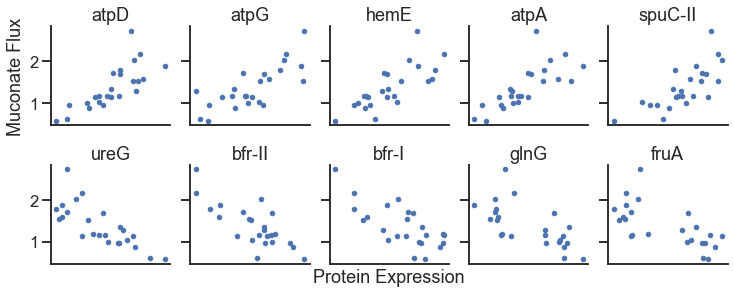

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,4), sharey=True)

for i, ax in enumerate(axs[0], start=1):
    ax.plot(grouped[corrs.index[-i]], muconate_flux, '.')
    ax.set_title(corrs.index[-i])
    ax.xaxis.set_ticks([])
    
for i, ax in enumerate(axs[1]):
    ax.plot(grouped[corrs.index[i]], muconate_flux, '.')
    ax.set_title(corrs.index[i])
    ax.xaxis.set_ticks([])

plt.tight_layout()
sns.despine()

axs[1, 2].set_xlabel('Protein Expression')
axs[0,0].set_ylabel('Muconate Flux')

plt.savefig('putida_figs/correlation.svg')

In [59]:
axs[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f341221ba10>,
      dtype=object)

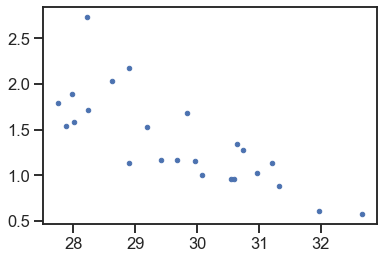

In [34]:
plt.plot(grouped['ureG'], data['vn']['DM_ccmuac_c'], '.')